In [9]:
import numpy as np
from matplotlib import pyplot as plt
from find_shifts import get_files, get_images
import networkx as nx
%matplotlib widget

In [2]:
g = get_files()
image_data = get_images(g)
results = np.load("shifts.npz")
shifts, error, phasediff = results["shifts"], results["error"], results["phasediff"]

In [12]:
s = np.array(image_data[0].shape[:2])
midpoint = s/2.
centroids = shifts[:, :, :2] + midpoint
centroids[2]

array([[482., 846.],
       [484.,  96.],
       [480., 640.],
       [ nan,  nan],
       [919.,  96.],
       [917., 642.],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]])

In [18]:
adj_matrix = np.any(~np.isnan(shifts[:,:]), axis=2).astype(np.uint8)
np.fill_diagonal(adj_matrix, 0)
adj_matrix

array([[0, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 1, 0]], dtype=uint8)

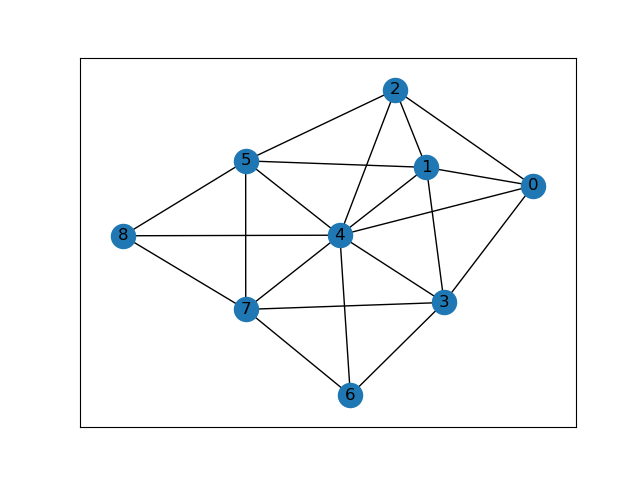

In [21]:
plt.clf()
g = nx.from_numpy_matrix(adj_matrix)
pos = nx.drawing.spring_layout(g)
nx.draw_networkx(g, pos=pos, with_labels=True)
plt.show()

In [11]:
pos = {}
for i, centroid in enumerate(centroids[0]):
    if (np.all(~np.isnan(centroid))):
        pos[i] = centroid
pos


{0: array([480., 640.]),
 1: array([ 482., 1168.]),
 2: array([478., 434.]),
 3: array([916., 642.]),
 4: array([ 917., 1170.])}

In [6]:
g = nx.Graph()
g.add_nodes_from(pos.keys())

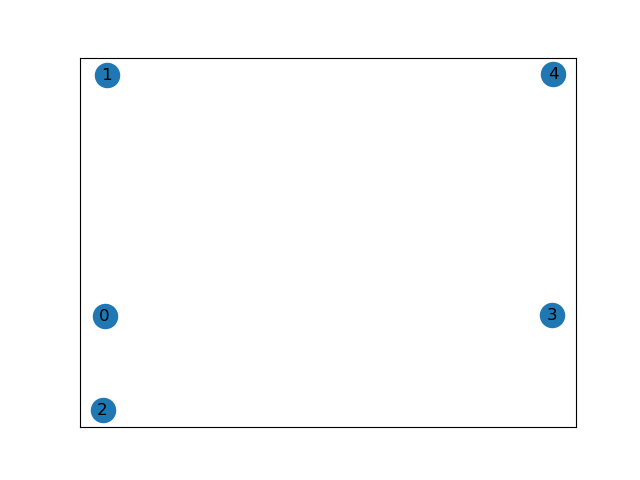

In [7]:
nx.draw_networkx(g, pos=pos)
plt.show()